In [46]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [50]:
def return_score_and_plot_curve(input,output):
    '''
    takes input 2D array and output 1D array as input aur returns score after linear regression assume and plot
    curve showing how good the estimate is
    '''
    x_train,x_test,y_train,y_test=train_test_split(input,output,random_state=1)
    algorithm=LinearRegression()
    algorithm.fit(x_train,y_train)
    m=algorithm.coef_
    c=algorithm.intercept_
    print("Training Score : ",algorithm.score(x_train,y_train))
    print("Testing Score : ",algorithm.score(x_test,y_test))
    intercept_array=[]
    for i in range(len(input)):
        intercept_array.append(c)
    X=np.asmatrix(input)
    m=np.asmatrix(m)
    intercept=np.asmatrix(intercept_array)
    '''
    Y_predicted=m*X+intercept
    y_predicted=Y_predicted.tolist()
    plt.scatter(output,y_predicted) #should be y=x line for ideal prediction
    plt.show()
    '''
    '''
    print(X.shape)
    print(intercept.shape)
    #so above se clear m transpose lena hoga also of intercept
    m=np.transpose(m)
    print(m.shape)
    '''
    m=np.transpose(m)
    intercept=np.transpose(intercept)
    Y_predicted=X*m+intercept
    y_predicted=Y_predicted.tolist()
    x=np.arange(output.min(),output.max(),0.1)
    plt.plot(x,x,color="black")
    plt.scatter(output,y_predicted,s=0.85) #should be y=x line for ideal prediction
    plt.show()
   

Training Score :  0.7168057552393374
Testing Score :  0.7789410172622879


C:\Users\sagni\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

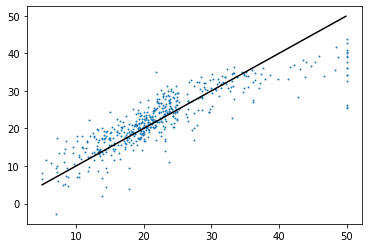

In [51]:
from sklearn import datasets
boston=datasets.load_boston()
input=np.array(boston["data"])
output=np.array(boston["target"])
return_score_and_plot_curve(input,output)

(506, 104)
Training Score :  0.9281262443260947
Testing Score :  0.8962092351541875


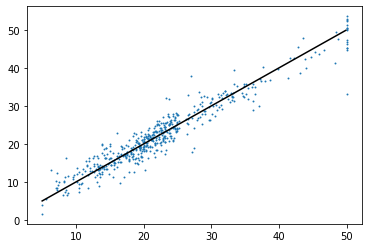

In [52]:
intermediate_list=input.tolist()
input_parameters=len(input[0])
for k in range(len(input)):
    #har row/datapoint ke liye following kaam karenge
    for i in range(input_parameters): #as 13 initial input features in boston dataset
        for j in range(i,input_parameters):
            #each row mei yeh features append
            #np.append(input[k],input[k][i]*input[k][j])
            #numpy append tough so normal list mei convert
            intermediate_list[k].append(intermediate_list[k][i]*intermediate_list[k][j])
new_input=np.array(intermediate_list) #wapas np array mei as 
print(new_input.shape)
return_score_and_plot_curve(new_input,output)

Clearly y=x ke very close so improved a lot!!!!